# Image Classification (Dog VS Cat)

In this problem we’ll review two more essential techniques for applying deep learning to small datasets: feature extraction with a pretrained network (which will get you to an accuracy of 90% to 96%) and fine-tuning a pretrained network (this will get you to a final accuracy of 97%). Together, these three strategies—training a small model from scratch, doing feature extraction using a pretrained model, and fine-tuning a pretrained model—will constitute your future toolbox for tackling the problem of performing image classification with small datasets.

## Downloading the Dataset

This dataset contains 25,000 images of dogs and cats (12,500 from each class) and is 543 MB (compressed). After downloading and uncompressing it, you’ll create a new dataset containing three subsets: a training set with 1,000 samples of each class, a validation set with 500 samples of each class, and a test set with 500 samples of each class.

First we create the directories where the small dataset of images will be saved.

In [1]:
import os, shutil

original_dataset_dir = r'\Users\dipsa\Documents\dataset_cats_vs_dogs\train'

base_dir = r'\Users\dipsa\Documents\dataset_cats_vs_dogs\small_set'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

Now lets copy the first 1000 cat and dog images from the train to train_cats_dir and train_dogs_dir, the next 500 cat and dog images to validation_cats_dir and validation_dogs_dir and the next 500 cat and dog images to test_cats_dir and test_dogs_dir.

In [2]:
fnames = [f'cat.{i}.jpg' for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = [f'cat.{i}.jpg' for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = [f'cat.{i}.jpg' for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = [f'dog.{i}.jpg' for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = [f'dog.{i}.jpg' for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = [f'dog.{i}.jpg' for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [3]:
print(f'total training cat images:{len(os.listdir(train_cats_dir))}')

print(f'total training dog images:{len(os.listdir(train_dogs_dir))}')

print(f'total validation cat images:{len(os.listdir(validation_cats_dir))}')

print(f'total validation dog images:{len(os.listdir(validation_dogs_dir))}')

print(f'total test cat images:{len(os.listdir(test_cats_dir))}')

print(f'total test dog images:{len(os.listdir(test_dogs_dir))}')

total training cat images:1000
total training dog images:1000
total validation cat images:500
total validation dog images:500
total test cat images:500
total test dog images:500


Each split contains the same number of samples from each class: this is a balanced binary-classification problem, which means classification accuracy will be an appropriate measure of success.

## Build the network

The convnet will be a stack of alternated Conv2D (with relu activation) and MaxPooling2D layers. 

We are dealing with big images and a complex problem. For this reason the notwork will have 4 Conv2D+MaxPooling2D stages and then the Flatten and 2 Dense layers. The 4 stages of Conv2D+MaxPooling2D help to augment the capacity of the network and to further reduce the size of the feature maps so they are not overly large when we reach the Flatten layer. The inputs are of size 150x150 so we end up with feature maps of size 7x7 just begore the Flatten layer.

The problem is a binary classification problem so the last layer of the network must have a single unit and a sigmoid activation.

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

For the compilation step, you’ll go with the RMSprop optimizer, as usual. Because you ended the network with a single sigmoid unit, you’ll use binary crossentropy as the loss.

In [6]:
from keras import optimizers

model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
             loss='binary_crossentropy',
             metrics=['accuracy'])

## Data preprocessing

As you know by now, data should be formatted into appropriately preprocessed floatingpoint tensors before being fed into the network. Currently, the data sits on a drive as JPEG files, so the steps for getting it into the network are roughly as follows:
* Read the picture files.
* Decode the JPEG content to RGB grids of pixels.
* Convert these into floating-point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

Keras has a module with image-processing helper tools, located at keras.preprocessing.image. In particular, it contains the class mageDataGenerator, which lets you quickly set up Python generators that can automatically turn image files on disk into batches of preprocessed tensors. This is what you’ll use here.

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
         train_dir,
         target_size=(150,150),
         batch_size=20,
         class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
         validation_dir,
         target_size=(150,150),
         batch_size=20,
         class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Let’s fit the model to the data using the generator. You do so using the fit_generator method, the equivalent of fit for data generators like this one. It expects as its first argument a Python generator that will yield batches of inputs and targets indefinitely, like this one does. Because the data is being generated endlessly, the Keras model needs to know how many samples to draw from the generator before declaring an epoch over. This is the role of the steps_per_epoch argument: after having drawn steps_per_epoch batches from the generator—that is, after having run for steps_per_epoch gradient descent steps—the fitting process will go to the next epoch. In this case, batches are 20 samples, so it will take 100 batches until you see your target of 2,000 samples.

When using fit_generator, you can pass a validation_data argument, much as with the fit method. It’s important to note that this argument is allowed to be a data generator, but it could also be a tuple of Numpy arrays. If you pass a generator as validation_data, then this generator is expected to yield batches of validation data endlessly; thus you should also specify the validation_steps argument, which tells the process how many batches to draw from the validation generator for evaluation.

In [8]:
history = model.fit(train_generator,
                             steps_per_epoch = 100,
                             epochs = 30,
                             validation_data = validation_generator,
                             validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 60s 587ms/step - loss: 0.6915 - accuracy: 0.5360 - val_loss: 0.6866 - val_accuracy: 0.5920
Epoch 2/30
100/100 [==============================] - 38s 384ms/step - loss: 0.6650 - accuracy: 0.6020 - val_loss: 0.6609 - val_accuracy: 0.5740
Epoch 3/30
100/100 [==============================] - 39s 387ms/step - loss: 0.6014 - accuracy: 0.6765 - val_loss: 0.6071 - val_accuracy: 0.6650
Epoch 4/30
100/100 [==============================] - 38s 384ms/step - loss: 0.5549 - accuracy: 0.7090 - val_loss: 0.5696 - val_accuracy: 0.6950
Epoch 5/30
100/100 [==============================] - 39s 390ms/step - loss: 0.5275 - accuracy: 0.7355 - val_loss: 0.6211 - val_accuracy: 0.6590
Epoch 6/30
100/100 [==============================] - 230s 2s/step - loss: 0.4798 - accuracy: 0.7680 - val_loss: 0.5564 - val_accuracy: 0.7060
Epoch 7/30
100/100 [==============================] - 36s 359ms/step - loss: 0.4418 - accuracy: 0.8035 - val_loss: 0.6149 - val_accu

In [9]:
model.save('cats_and_dogs_small_1.h5')

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

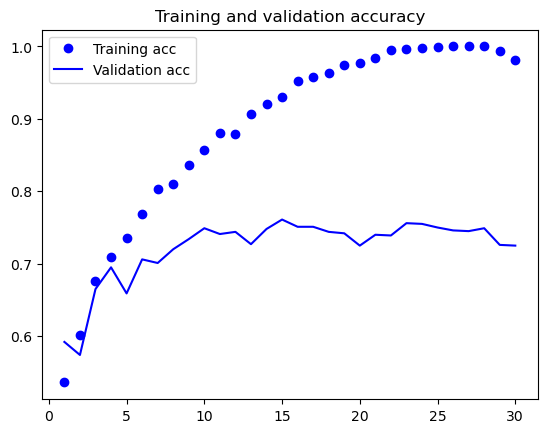

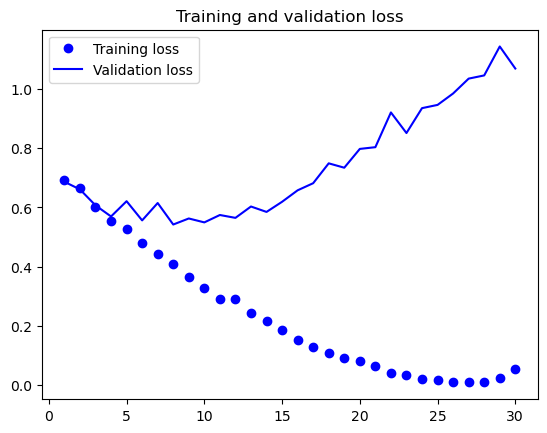

In [11]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label="Training acc")
plt.plot(epochs,val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label="Training loss")
plt.plot(epochs,val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

These plots are characteristic of overfitting. The training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 75%. The validation loss reaches its minimum after only five epochs and then stalls, whereas the training loss keeps decreasing linearly until it reaches nearly 0.

Because you have relatively few training samples (2,000), overfitting will be your number-one concern. You already know about a number of techniques that can help mitigate overfitting, such as dropout and weight decay (L2 regularization). We’re now going to work with a new one, specific to computer vision and used almost universally when processing images with deep-learning models: data augmentation.

## Data augmentation

Overfitting in this example is caused from the fact that we have too few samples. In the case we had infite data the model would be exposed to every possible aspect of the data distribution at hand: you would never overfit. Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of random tranformations that yield believable-looking images. The goal is that at training time, your model will never see the exact same picture twice. This helps the model to more aspects of the data nad generalize better.

In Keras, this can be done by configuring a number of random transformations to be perfomed on the images read by the ImageDataGenerator instance. 

First, setup a data augmentation configuration via ImageDataGenerator.

In [12]:
datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

These are just a few of the options available (for more, see the Keras documentation).

Let’s quickly go over this code:
* rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures.
* width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* shear_range is for randomly applying shearing transformations.
* zoom_range is for randomly zooming inside pictures.
* horizontal_flip is for randomly flipping half the images horizontally—relevant when there are no assumptions of horizontal asymmetry (for example, real-world pictures).
* fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

Now lets look at the augmnted pictures.

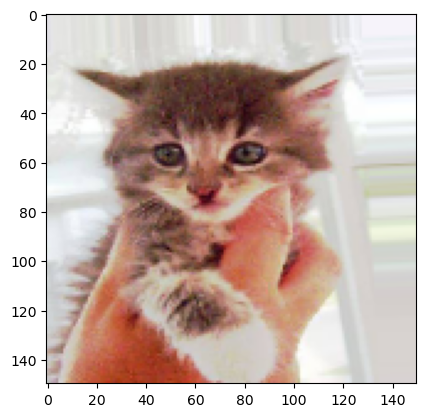

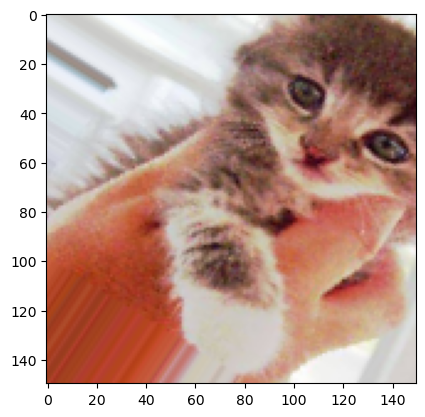

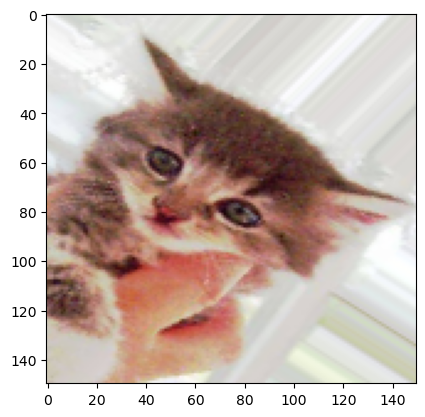

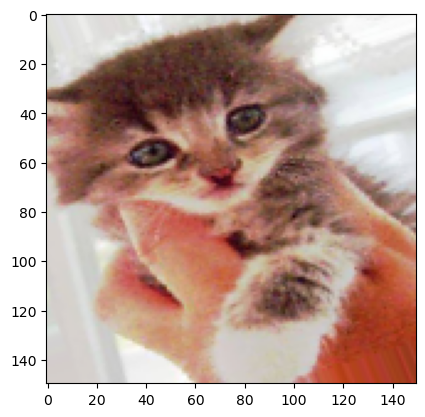

In [16]:
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array, array_to_img

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = load_img(img_path, target_size=(150,150))

x = img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 4 ==0:
        break

plt.show()

If you train a new network using this data-augmentation configuration, the network will never see the same input twice. But the inputs it sees are still heavily intercorrelated, because they come from a small number of original images—you can’t produce new information, you can only remix existing information. As such, this may not be enough to completely get rid of overfitting. To further fight overfitting, you’ll also add a Dropout layer to your model, right before the densely connected classifier.

New convnet.

In [18]:
model_n = models.Sequential()
model_n.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(150,150,3)))
model_n.add(layers.MaxPooling2D((2,2)))
model_n.add(layers.Conv2D(64,(3,3),activation='relu'))
model_n.add(layers.MaxPooling2D((2,2)))
model_n.add(layers.Conv2D(128,(3,3),activation='relu'))
model_n.add(layers.MaxPooling2D((2,2)))
model_n.add(layers.Conv2D(128,(3,3),activation='relu'))
model_n.add(layers.MaxPooling2D((2,2)))
model_n.add(layers.Flatten())
model_n.add(layers.Dropout(0.5))
model_n.add(layers.Dense(512, activation='relu'))
model_n.add(layers.Dense(1, activation='sigmoid'))

model_n.compile(loss='binary_crossentropy',
               optimizer=optimizers.Adam(learning_rate=1e-4),
               metrics=['accuracy'])

Now train the new model using data augmentation and dropout.

In [22]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size=20,
                                                       class_mode='binary')

history_n = model_n.fit(train_generator,
                        steps_per_epoch=100,
                        epochs=100,
                        validation_data=validation_generator,
                        validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 28s 283ms/step - loss: 0.6317 - accuracy: 0.6405 - val_loss: 0.5933 - val_accuracy: 0.6750
Epoch 2/100
100/100 [==============================] - 29s 289ms/step - loss: 0.6211 - accuracy: 0.6595 - val_loss: 0.7216 - val_accuracy: 0.5512
Epoch 3/100
100/100 [==============================] - 29s 287ms/step - loss: 0.6163 - accuracy: 0.6665 - val_loss: 0.5738 - val_accuracy: 0.6950
Epoch 4/100
100/100 [==============================] - 29s 288ms/step - loss: 0.6036 - accuracy: 0.6845 - val_loss: 0.5686 - val_accuracy: 0.6925
Epoch 5/100
100/100 [==============================] - 30s 300ms/step - loss: 0.5924 - accuracy: 0.6805 - val_loss: 0.5826 - val_accuracy: 0.6888
Epoch 6/100
100/100 [==============================] - 31s 311ms/step - loss: 0.5847 - accuracy: 0.6855 - val_loss: 0.5613 - val_accuracy: 0.7088
Epoch 7/100
100/100 [===================

In [23]:
model_n.save('cats_and_dogs_small_2.h5')

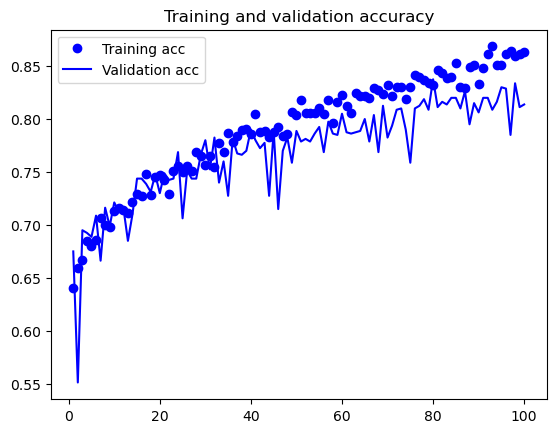

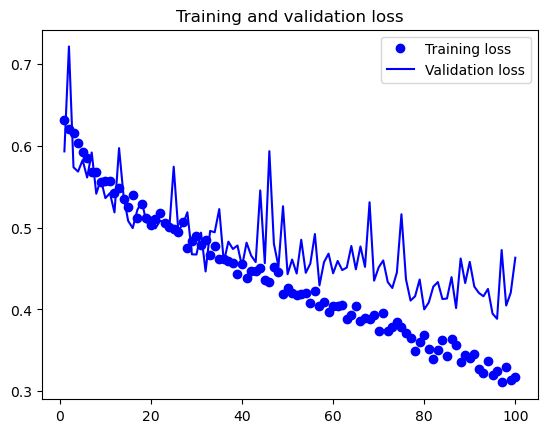

In [24]:
import matplotlib.pyplot as plt

acc = history_n.history['accuracy']
val_acc = history_n.history['val_accuracy']
loss = history_n.history['loss']
val_loss = history_n.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label="Training acc")
plt.plot(epochs,val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label="Training loss")
plt.plot(epochs,val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Thanks to data augmentation and dropout, you’re no longer overfitting: the training curves are closely tracking the validation curves. You now reach an accuracy of 82%, a 15% relative improvement over the non-regularized model.

## Using a pre-trained convnet

A pretrained network is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task. If this original dataset is large enough and general enough, then the spatial hierarchy of features learned by the pretrained network can effectively act as a generic model of the visual world, and hence its features can prove useful for many different computervision problems, even though these new problems may involve completely different classes than those of the original task.

In this case, let’s consider a large convnet trained on the ImageNet dataset(1.4 million labeled images and 1,000 different classes). ImageNet contains many animal classes, including different species of cats and dogs, and you can thus expect to perform well on the dogs-versus-cats classification problem.

You’ll use the VGG16 architecture, developed by Karen Simonyan and Andrew Zisserman in 2014; it’s a simple and widely used convnet architecture for ImageNet.

There are two ways to use a pretrained network: feature extraction and fine-tuning.

### Feature Extraction

Feature extraction consists of using the representations learned by a previous network to extract interesting features from new samples. These features are then run through a new classifier, which is trained from scratch.

As you saw previously, convnets used for image classification comprise two parts: they start with a series of pooling and convolution layers, and they end with a densely connected classifier. The first part is called the convolutional base of the model. In the case of convnets, feature extraction consists of taking the convolutional base of a previously trained network, running the new data through it, and training a new classifier on top of the output.

Why only reuse the convolutional base? Could you reuse the densely connected classifier as well? In general, doing so should be avoided. The reason is that the representations learned by the convolutional base are likely to be more generic and therefore more reusable: the feature maps of a convnet are presence maps of generic concepts over a picture, which is likely to be useful regardless of the computer-vision problem at hand. But the representations learned by the classifier will necessarily be specific to the set of classes on which the model was trained—they will only contain information about the presence probability of this or that class in the entire picture. Additionally, representations found in densely connected layers no longer contain any information about where objects are located in the input image: these layers get rid of the notion of space, whereas the object location is still described by convolutional feature maps. For problems where object location matters, densely connected features are largely useless.

Note that the level of generality (and therefore reusability) of the representations extracted by specific convolution layers depends on the depth of the layer in the model. Layers that come earlier in the model extract local, highly generic feature maps (such as visual edges, colors, and textures), whereas layers that are higher up extract more-abstract concepts (such as “cat ear” or “dog eye”). So if your new dataset differs a lot from the dataset on which the original model was trained, you may be better off using only the first few layers of the model to do feature extraction, rather than using the entire convolutional base.

In [25]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3))

58889256/58889256 [==============================] - 41s 1us/step


You pass three arguments to the constructor:
* weights specifies the weight checkpoint from which to initialize the model.
* include_top refers to including (or not) the densely connected classifier on top of the network. By default, this densely connected classifier corresponds to the 1,000 classes from ImageNet. Because you intend to use your own densely connected classifier (with only two classes: cat and dog), you don’t need to include it.
* input_shape is the shape of the image tensors that you’ll feed to the network. This argument is purely optional: if you don’t pass it, the network will be able to process inputs of any size.

Next follows the detail of the architecture of the VGG16 convolutional base.

In [26]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

The final feature map is of shape (4,4,512). That's the feature on top of which you will stick a densly connected classifier.

Now there are two ways to continue.
* Running the convolutional base over the dataset, recording its output to a Numpy array on disk, and then using this data as input to a standalone, densly conncted classifier. This solution is fast and cheap to run, because it only requires running the convolutional base once every input image, and the convolutional base is by far the most expensive part of the pipeline. But for the same reason, this technique won't allow you to use data auhmentation.
* Extending the model you have (conv_base) by adding Dense layers on top, and running the whole thing end to end on the input data. This will allow you to use data augmentation, because every input image goes through the convolutional base every time its seen by the model. But for the same reason, this technique is far more expensive than the first.

#### First Way: Fast feature extraction without data augmentation

Start by running instances of the previously introduced ImageDataGenerator to extract images as Numpy arrays as well as their labels. We extract features from these images by calling the predict method of the conv_base model.

In [27]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = r'\Users\dipsa\Documents\dataset_cats_vs_dogs\small_set'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count,4,4,512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,
                                           target_size=(150,150),
                                           batch_size=batch_size,
                                           class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, features_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 1s 593ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 1s 595ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 1s 579ms/step


The extracted features are currently of shape (samples, 4, 4, 512). You’ll feed them to a densely connected classifier, so first you must flatten them to (samples, 8192):

In [28]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000,4*4*512))
test_features = np.reshape(test_features, (1000,4*4*512))

At this point, you can define your densely connected classifier (note the use of dropout for regularization) and train it on the data and labels that you just recorded.

In [31]:
from keras import models
from keras import layers
from keras import optimizers

model_fast = models.Sequential()
model_fast.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model_fast.add(layers.Dropout(0.5))
model_fast.add(layers.Dense(1,activation='sigmoid'))

model_fast.compile(optimizers.RMSprop(learning_rate=2e-5),
             loss='binary_crossentropy',
             metrics=['accuracy'])

history_fast = model_fast.fit(train_features, train_labels,
                             epochs=30,
                             batch_size=20,
                             validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 2s 19ms/step - loss: 0.5916 - accuracy: 0.6755 - val_loss: 0.4467 - val_accuracy: 0.8430
Epoch 2/30
100/100 [==============================] - 2s 18ms/step - loss: 0.4270 - accuracy: 0.8140 - val_loss: 0.3783 - val_accuracy: 0.8460
Epoch 3/30
100/100 [==============================] - 2s 18ms/step - loss: 0.3554 - accuracy: 0.8475 - val_loss: 0.3385 - val_accuracy: 0.8600
Epoch 4/30
100/100 [==============================] - 2s 18ms/step - loss: 0.3108 - accuracy: 0.8690 - val_loss: 0.2999 - val_accuracy: 0.8910
Epoch 5/30
100/100 [==============================] - 2s 18ms/step - loss: 0.2882 - accuracy: 0.8875 - val_loss: 0.2827 - val_accuracy: 0.8930
Epoch 6/30
100/100 [==============================] - 2s 18ms/step - loss: 0.2663 - accuracy: 0.8980 - val_loss: 0.2804 - val_accuracy: 0.8890
Epoch 7/30
100/100 [==============================] - 2s 18ms/step - loss: 0.2510 - accuracy: 0.9005 - val_loss: 0.2749 - val_accuracy: 0.8850

Let's take a look at loss and accuracy curves.

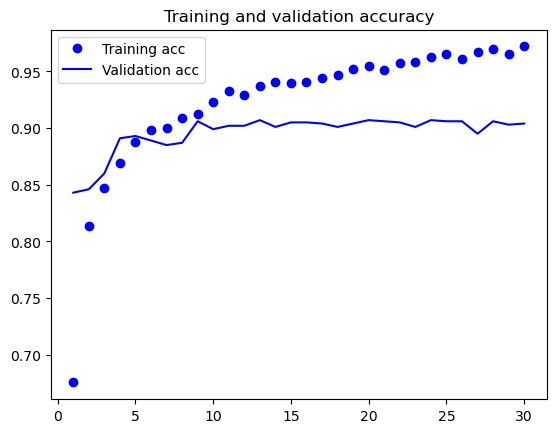

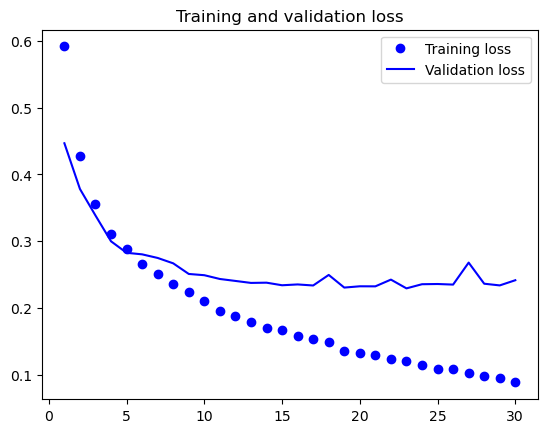

In [32]:
import matplotlib.pyplot as plt

acc = history_fast.history['accuracy']
val_acc = history_fast.history['val_accuracy']
loss = history_fast.history['loss']
val_loss = history_fast.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Validation accuracy of 90%! Much better than the previous model!!! However plots show that overfitting is present almost from thw start-despite using dropout with a fairly large rate. The usage of data augmentation is essential to combat overfitting so next we will see feature extraction with data augmentation.

#### Second way: Feature extraction with data augmentation

This method is much slower and more expensive, but allows you to use data augmentationduring training: extending teh conv_base model and running it end to end on the inputs.

Because models behave just like layers, you can add a model (like conv_base) to a Sequential model just like you would add a layer.

So add a densely connected classifier on top of the convolutional base.

In [33]:
from keras import models
from keras import layers

model_slow = models.Sequential()
model_slow.add(conv_base)
model_slow.add(layers.Flatten())
model_slow.add(layers.Dense(256, activation='relu'))
model_slow.add(layers.Dense(1, activation='sigmoid'))

In [34]:
model_slow.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               2097408   
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


As you can see, the convolutional base of VGG16 has 14,714,688 parameters, which is very large. The classifier you’re adding on top has 2 million parameters.

Before you compile and train the model, it’s very important to freeze the convolutional base. Freezing a layer or set of layers means preventing their weights from being updated during training. If you don’t do this, then the representations that were previously learned by the convolutional base will be modified during training. Because the Dense layers on top are randomly initialized, very large weight updates would be propagated through the network, effectively destroying the representations previously learned.

In Keras, you freeze a network by setting its trainable attribute to False:

In [36]:
print(f'This is the number of trainable weights before freezing the conv base: {len(model_slow.trainable_weights)}')

This is the number of trainable weights before freezing the conv base: 30


In [38]:
conv_base.trainable = False

In [39]:
print(f'This is the number of trainable weights before freezing the conv base: {len(model_slow.trainable_weights)}')

This is the number of trainable weights before freezing the conv base: 4


With this setup, only the weights from the two Dense layers that you added will be trained. That’s a total of four weight tensors: two per layer (the main weight matrix and the bias vector). Note that in order for these changes to take effect, you must first compile the model. If you ever modify weight trainability after compilation, you should then recompile the model, or these changes will be ignored.

Now train the model with data augmentation.

In [44]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size=20,
                                                       class_mode='binary')

model_slow.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(learning_rate=2e-5),
                  metrics=['accuracy'])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [45]:
history_slow = model_slow.fit(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/30
100/100 [==============================] - 90s 895ms/step - loss: 0.3241 - accuracy: 0.8565 - val_loss: 0.2607 - val_accuracy: 0.8980
Epoch 2/30
100/100 [==============================] - 111s 1s/step - loss: 0.3271 - accuracy: 0.8585 - val_loss: 0.2722 - val_accuracy: 0.8870
Epoch 3/30
100/100 [==============================] - 120s 1s/step - loss: 0.3153 - accuracy: 0.8630 - val_loss: 0.2555 - val_accuracy: 0.8930
Epoch 4/30
100/100 [==============================] - 115s 1s/step - loss: 0.3110 - accuracy: 0.8560 - val_loss: 0.2565 - val_accuracy: 0.8940
Epoch 5/30
100/100 [==============================] - 118s 1s/step - loss: 0.3088 - accuracy: 0.8585 - val_loss: 0.2500 - val_accuracy: 0.8960
Epoch 6/30
100/100 [==============================] - 115s 1s/step - loss: 0.3144 - accuracy: 0.8610 - val_loss: 0.2473 - val_accuracy: 0.8980
Epoch 7/30
100/100 [==============================] - 119s 1s/step - loss: 0.3097 - accuracy: 0.8690 - val_loss: 0.2501 - val_accuracy: 0.89

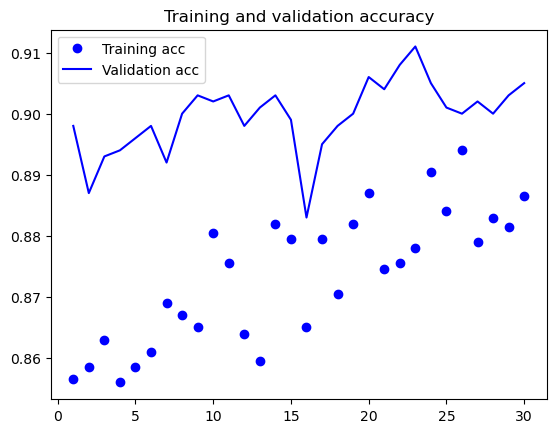

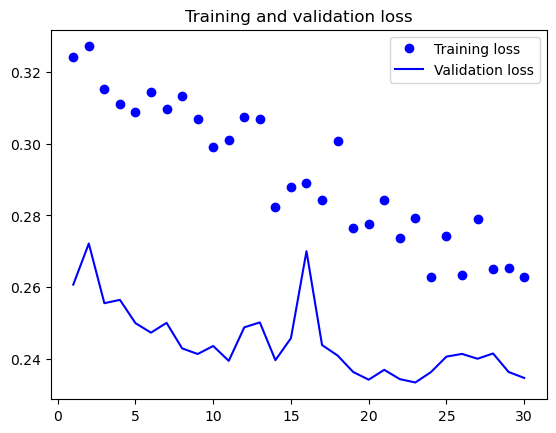

In [46]:
import matplotlib.pyplot as plt

acc = history_slow.history['accuracy']
val_acc = history_slow.history['val_accuracy']
loss = history_slow.history['loss']
val_loss = history_slow.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Fine-tuning

A complementary technique to feature extraction for model reuse is fine-tuning. Fine-tuning consists of unfreezing a few of the top layers of a frozen model base used for feature extraction, and jointly training both the newly added part of the model (in this case, the fully connected classifier) and these top layers. This is called fine-tuning because it slightly adjusts the more abstract representations of the model being reused, in order to make them more relevant for the problem at hand.

For the same reason, it’s only possible to fine-tune the top layers of the convolutional base once the classifier on top has already been trained. If the classifier isn’t already trained, then the error signal propagating through the network during training will be too large, and the representations previously learned by the layers being fine-tuned will be destroyed. Thus the steps for fine-tuning a network are as follow:
* Add your custom network on top of an already-trained base network.
* Freeze the base network.
* Train the part you added.
* Unfreeze some layers in the base network.
* Jointly train both these layers and the part you added.

You already completed the first three steps when doing feature extraction. Let’s proceed with step 4: you’ll unfreeze your conv_base and then freeze individual layers inside it.

In [47]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

You’ll fine-tune the last three convolutional layers, which means all layers up to block4_pool should be frozen, and the layers block5_conv1, block5_conv2, and block5_conv3 should be trainable.

Why not fine-tune more layers? Why not fine-tune the entire convolutional base? You could. But you need to consider the following:
* Earlier layers in the convolutional base encode more-generic, reusable features, whereas layers higher up encode more-specialized features. It’s more useful to fine-tune the more specialized features, because these are the ones that need to be repurposed on your new problem. There would be fast-decreasing returns in fine-tuning lower layers.
* The more parameters you’re training, the more you’re at risk of overfitting. The convolutional base has 15 million parameters, so it would be risky to attempt to train it on your small dataset.

Thus, in this situation, it’s a good strategy to fine-tune only the top two or three layers in the convolutional base.

In [48]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

Now you can begin fine-tuning the network. You’ll do this with the RMSProp optimizer, using a very low learning rate. The reason for using a low learning rate is that you want to limit the magnitude of the modifications you make to the representations of the three layers you’re fine-tuning. Updates that are too large may harm these representations.

In [50]:
model_slow.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(learning_rate=1e-5),
                  metrics=['accuracy'])

history_slow2 = model_slow.fit(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/100
100/100 [==============================] - 162s 2s/step - loss: 0.1898 - accuracy: 0.9165 - val_loss: 0.1986 - val_accuracy: 0.9200
Epoch 2/100
100/100 [==============================] - 163s 2s/step - loss: 0.1818 - accuracy: 0.9205 - val_loss: 0.2375 - val_accuracy: 0.9120
Epoch 3/100
100/100 [==============================] - 157s 2s/step - loss: 0.1606 - accuracy: 0.9335 - val_loss: 0.2039 - val_accuracy: 0.9190
Epoch 4/100
100/100 [==============================] - 157s 2s/step - loss: 0.1528 - accuracy: 0.9385 - val_loss: 0.2214 - val_accuracy: 0.9140
Epoch 5/100
100/100 [==============================] - 156s 2s/step - loss: 0.1545 - accuracy: 0.9310 - val_loss: 0.2012 - val_accuracy: 0.9170
Epoch 6/100
100/100 [==============================] - 160s 2s/step - loss: 0.1410 - accuracy: 0.9435 - val_loss: 0.2228 - val_accuracy: 0.9290
Epoch 7/100
100/100 [==============================] - 169s 2s/step - loss: 0.1412 - accuracy: 0.9440 - val_loss: 0.1904 - val_accuracy:

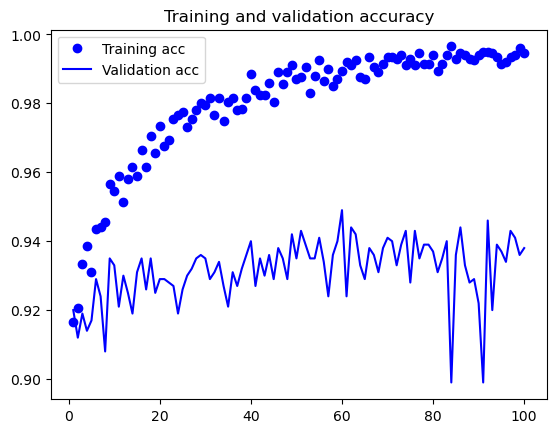

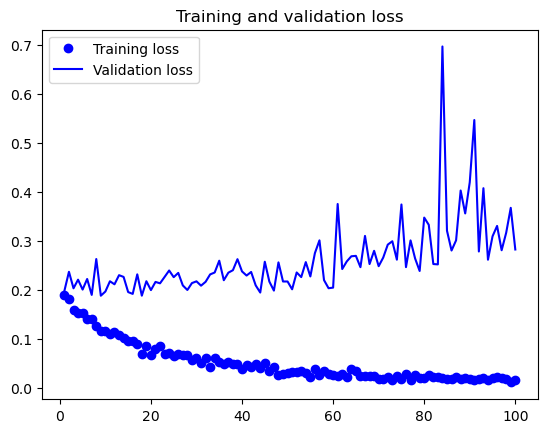

In [51]:
import matplotlib.pyplot as plt

acc = history_slow2.history['accuracy']
val_acc = history_slow2.history['val_accuracy']
loss = history_slow2.history['loss']
val_loss = history_slow2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

These curves look noisy. To make them more readable, you can smooth them by replacing every loss and accuracy with exponential moving averages of these quantities.

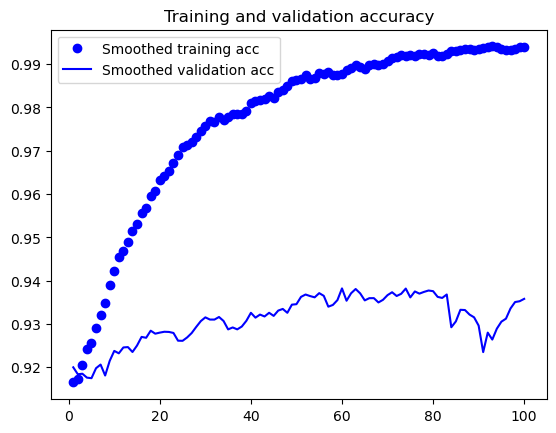

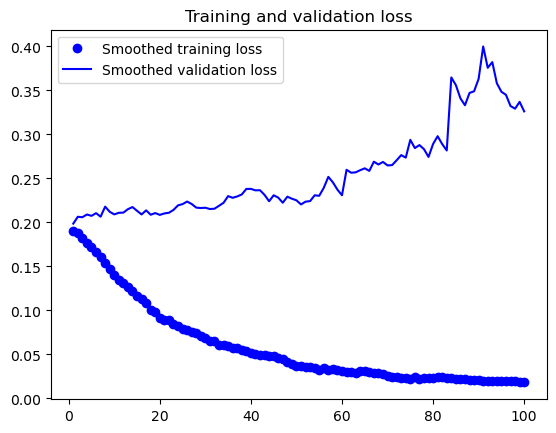

In [52]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
plt.plot(epochs,
    smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
    smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,
    smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
    smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Evaluate the model on the test data.

In [53]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(150,150),
                                                 batch_size=20,
                                                 class_mode='binary')

test_loss, test_acc = model_slow.evaluate(test_generator,steps=50)
print(f'test acc: {test_acc} and test loss: {test_loss}')

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 29s 574ms/step - loss: 0.3279 - accuracy: 0.9380
test acc: 0.9380000233650208 and test loss: 0.3279481828212738


Here we get a test accuracy of 93.8% (with only 10% of the full data).

## Visualizing what convnets learn

